# Task 1

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scipy.stats as scp
import math
from sklearn import cross_validation, datasets, metrics, neighbors 


%matplotlib inline
%pylab inline

SIZE = 1000

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Генерация данных:

In [94]:
classification_problem = datasets.make_classification(n_samples=10000, n_features=2, n_informative=2, 
                                                      n_classes=4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

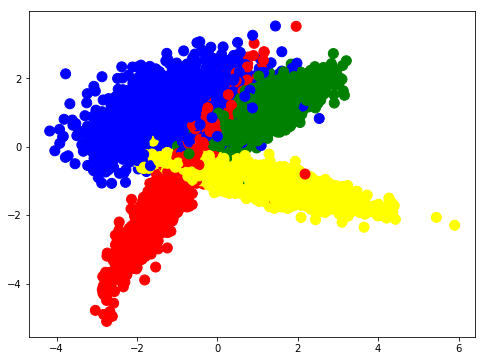

In [95]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [96]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Визуализируем разделяющие поверхности:

In [38]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [42]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'
                 .format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'
                 .format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [45]:
def plot_surface_with_k_neighbours(k):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

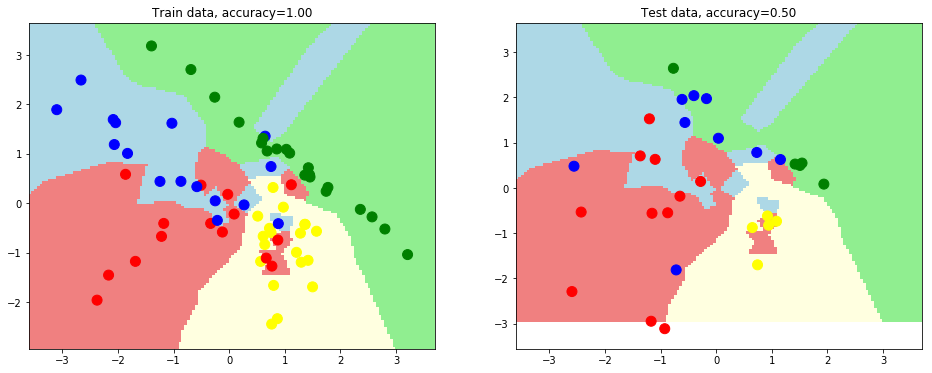

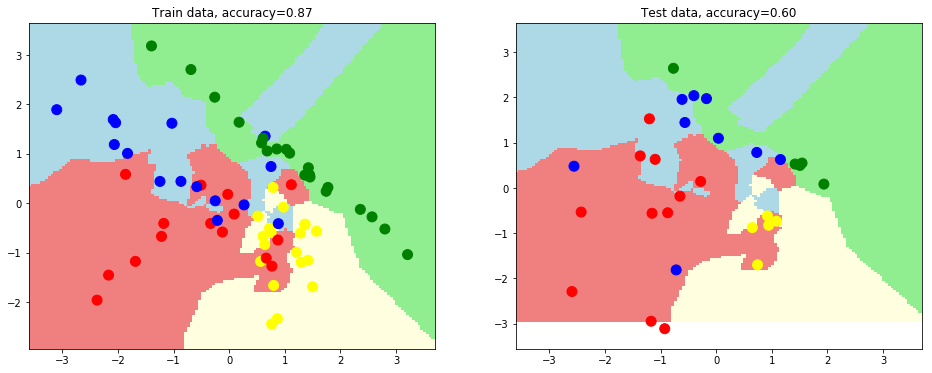

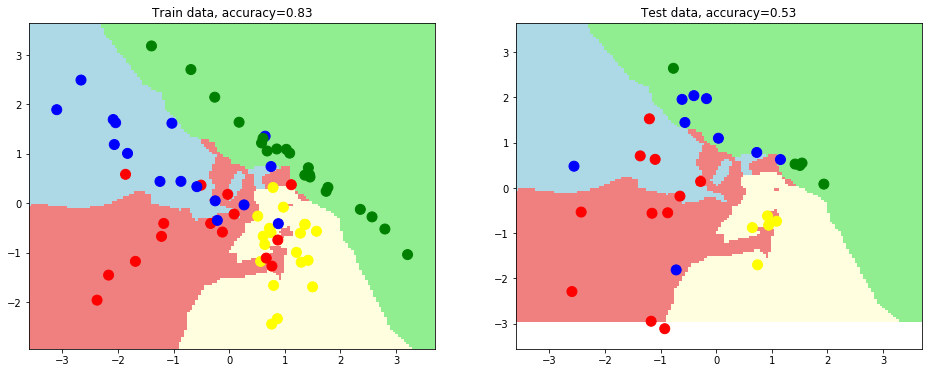

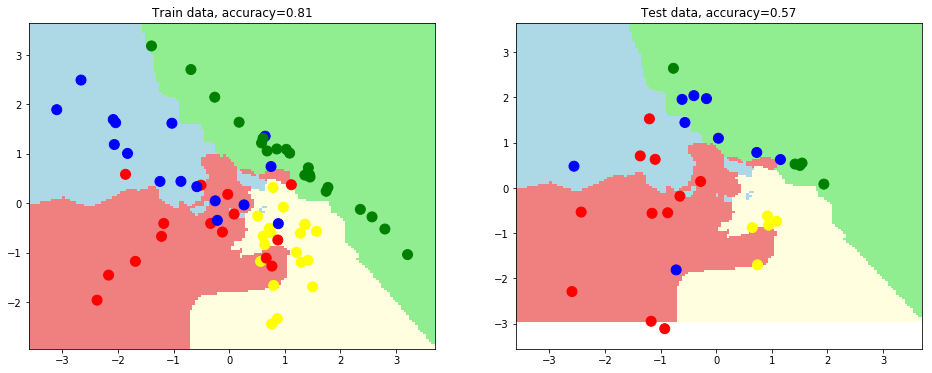

In [52]:
for i in range(1,5):
    plot_surface_with_k_neighbours(i)

### Теперь построим график accuracy от количества соседей:

In [97]:
def get_accuracy(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    
    estimator.fit(train_data, train_labels)
    return [metrics.accuracy_score(train_labels, estimator.predict(train_data)), 
        metrics.accuracy_score(test_labels, estimator.predict(test_data))]
    
def get_accuracy_for_k_neighbours(k):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    return get_accuracy(estimator, train_data, train_labels, test_data, test_labels)

def get_accuracy_array():
    result = []
    for i in range(1,100):
        result.append(get_accuracy_for_k_neighbours(i))
    return np.array(result)

In [98]:
accuracy = (get_accuracy_array())[:,1]

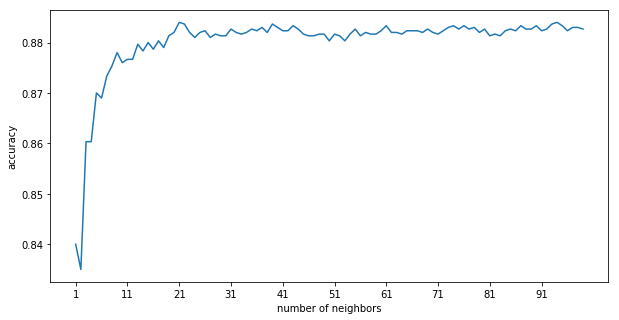

In [100]:
fig = plt.figure(figsize=[10, 5])
plt.plot(np.arange(1, 100), accuracy)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,100)[::10])
plt.show()

Как мы видим, наилучшая accuracy получается при $n=20$

# Task 2

In [84]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes

In [67]:
digits = datasets.load_digits()

In [68]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [69]:
breast = datasets.load_breast_cancer()

In [73]:
breast

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [90]:
def get_number_of_operations(method, d_set):
    return np.mean(cross_val_score(method, d_set.data, d_set.target))

In [92]:
print('digits dataset:')
print('bernulli accuracy = {:.2f}'.format(get_number_of_operations(naive_bayes.BernoulliNB(), digits)))
print('multinomial accuracy = {:.2f}'.format(get_number_of_operations(naive_bayes.MultinomialNB(), digits)))
print('gaussian accuracy = {:.2f}'.format(get_number_of_operations(naive_bayes.GaussianNB(), digits)))

digits dataset:
bernulli accuracy = 0.83
multinomial accuracy = 0.87
gaussian accuracy = 0.82


In [93]:
print('breast_canser dataset:')
print('bernulli accuracy = {:.2f}'.format(get_number_of_operations(naive_bayes.BernoulliNB(), breast)))
print('multinomial accuracy = {:.2f}'.format(get_number_of_operations(naive_bayes.MultinomialNB(), breast)))
print('gaussian accuracy = {:.2f}'.format(get_number_of_operations(naive_bayes.GaussianNB(), breast)))

breast_canser dataset:
bernulli accuracy = 0.63
multinomial accuracy = 0.89
gaussian accuracy = 0.94


Итак, максимально качество 
на датасете digits: $0.87$
на датасете breast_canser: $0.94$

Из наших данных верны следующие пункты: (b)

# Task 3

### Сгенерируем выборку точек

In [107]:
A = 0
SCALE = 0.2
SIZE = 500

eps = np.array(scp.norm.rvs(loc=A, scale=SCALE, size=SIZE))
sampleX = np.array(scp.uniform.rvs(loc=0, scale=10, size=SIZE))
sampleY = sampleX * 0.5 + 1 + eps

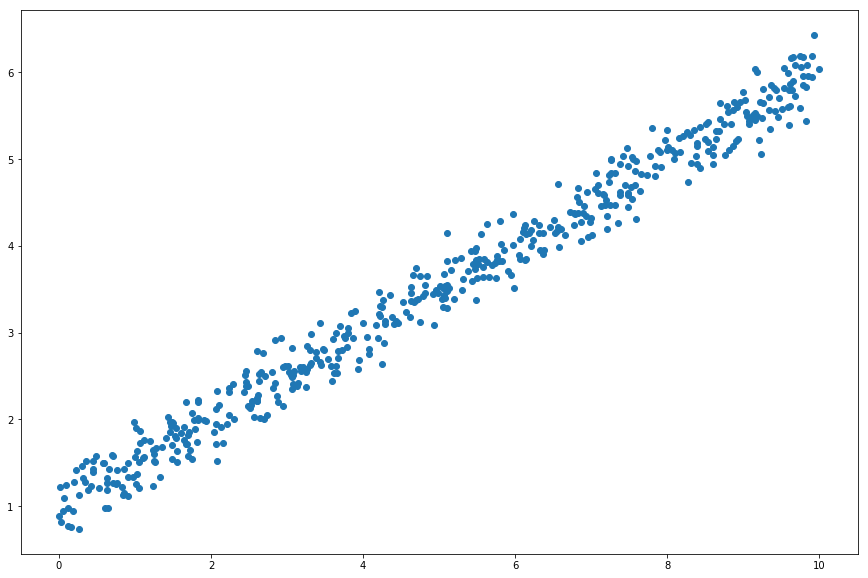

In [108]:
fig = plt.figure(figsize=[15, 10])
plt.scatter(sampleX, sampleY)
plt.show()

### Построим оценки

In [110]:
from scipy.optimize import minimize

In [129]:
def func(args, x):
    k, b = args
    return k * x + b

def func_mean_sqaures(args):
    k, b = args
    return ((k * sampleX + b - sampleY) ** 2).mean()

def func_mean_abs(args):
    k, b = args
    return np.mean(np.fabs(k * sampleX + b - sampleY))

In [130]:
bnds = ((0, 10), (-10, 10))
res_mean_squares = minimize(func_min_sqaures, (2, 0), bounds=bnds)
res_mean_abs = minimize(func_min_abs, (2, 0), bounds=bnds)

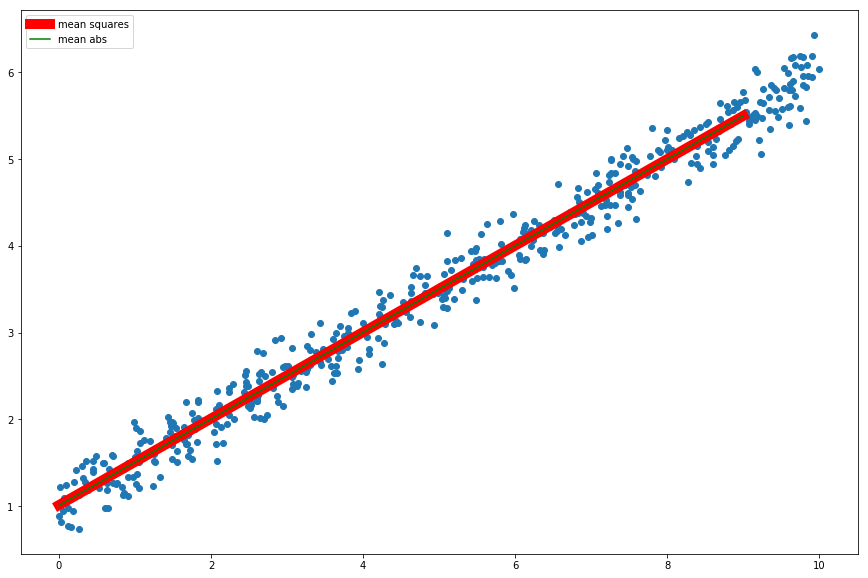

In [135]:
fig = plt.figure(figsize=[15, 10])
plt.scatter(sampleX, sampleY)
plt.plot(np.arange(10), func(res_mean_squares.x, np.arange(10)), linewidth=10, color='red', label=r'mean squares')
plt.plot(np.arange(10), func(res_mean_abs.x, np.arange(10)), color='green', label=r'mean abs')
plt.legend()
plt.show()

### Добавим выбросы

In [136]:
newEps = np.array(scp.norm.rvs(loc=A, scale=SCALE, size=75))
newX = np.array(scp.uniform.rvs(loc=0, scale=10, size=75))
newY = -1 + newEps

In [137]:
sampleX = np.append(sampleX, newX)
sampleY = np.append(sampleY, newY)

In [138]:
bnds = ((0, 10), (-10, 10))
res_mean_squares = minimize(func_min_sqaures, (2, 0), bounds=bnds)
res_mean_abs = minimize(func_min_abs, (2, 0), bounds=bnds)

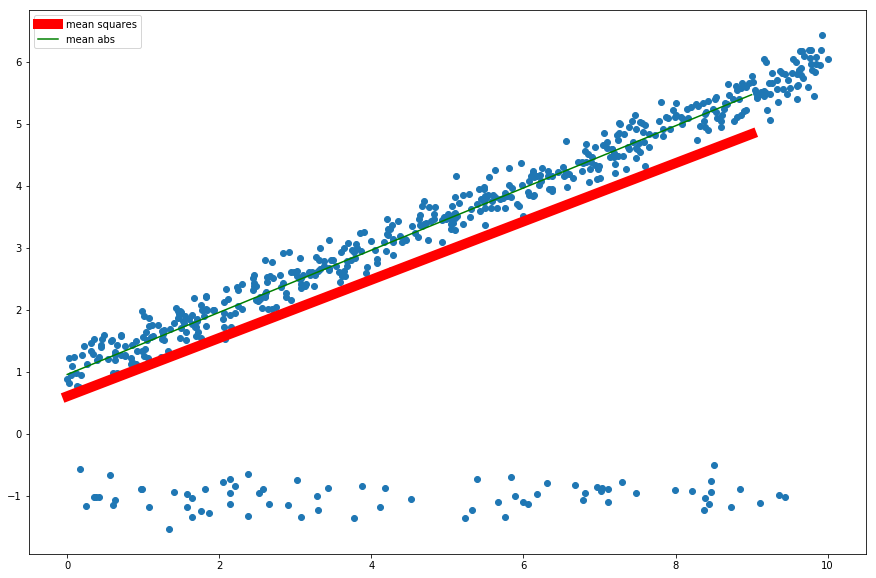

In [139]:
fig = plt.figure(figsize=[15, 10])
plt.scatter(sampleX, sampleY)
plt.plot(np.arange(10), func(res_mean_squares.x, np.arange(10)), linewidth=10, color='red', label=r'mean squares')
plt.plot(np.arange(10), func(res_mean_abs.x, np.arange(10)), color='green', label=r'mean abs')
plt.legend()
plt.show()

Как мы видим, метод минимизации среднего квадрата отклонения более подвержен влиянию выбросов.